# Lab 1: Wavefunctions and Fourier Series #



## Instructions: ##
### 1. Exit app mode: ###
To get started, you first need to exit "Appmode" in your nanoHUB Jupyter Notebook session. To do that, click the "Edit App" button that shows up at the top right of your screen, as illustrated in the image below.<br>
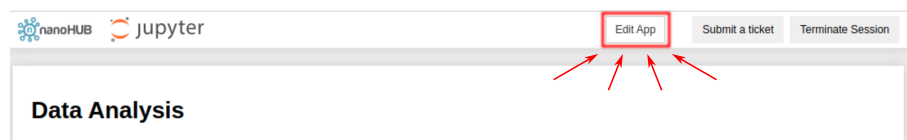
This will allow you view and modify the Python source code that the Jupyter Notebook runs. <br><br>




## Background ##

In this first experiment, you will review some of the Python code you learned in CHM37301. If you did not take take CHM37301 and are new to Python, this will also serve as an introduction to Python programming using the Jupyter Notebook interface on nanoHUB.org.  

The goals of this experiment are as follows:

2. To introduce you to **Python programming using the Jupyter Notebook interface** on nanoHUB.org. 

3. To review **Python commands** to plot, define functions, and run for loops in Python.

1. To **plot the quantum wavefunctions for a particle in a box model**.

4. To **simulate a traveling wave** and see how multiple sine waves can add together in a **Fourier series** to make different waveforms.

You will use the Jupyter notebook on nanoHUB for every lab this semester.  In this first experiment, most of the Python code will be provided.  After this lab, you will have to write most of your code from scratch. Make sure you understand the code you use today, because you will be using it in future labs.

## Importing Libraries and running a cell

First you will import the libraries that we will use in the rest of this notebook.  Run the code below by clicking in the box and selecting **Run** from the menu or pressing **Shift + Enter**. It should print "Libraries imported."

In [2]:
# This line tells Python to use the NumPy library
import numpy as np

# All of our plotting commands will now start with `plt`. 
import matplotlib.pyplot as plt

# We'll also change the default font size to make our plots more readable.
plt.rc('font', size=16) 
print("Libraries imported.")

Libraries imported.


<br>
<br>

## Plotting a Traveling Wave ##

In classical mechanics, particles are treated as having a single definite position and velocity.  You might say a particle is at $x=4$ and has a velocity of $v=+1$ m$/$s. This is an excellent description of large objects at our every day scale, but this formalism completely fails at very small scales. At the small scale of electrons and atoms, particles actually behave like waves. Waves are all around you. Light is a wave of the electromagnetic field.  Sound is a wave of vibrations of molecules.  In this section, you are going to learn about the fundamental properties of a wave and make an interactive simulation of a traveling wave. 
<br><br>
A simple position cosine wave looks like  $y = A \cos(\frac{2\pi}{\lambda} x)$. The wavelength $\lambda$ is the distance between two maxima or minima. The amplitude $A$ is half the peak-to-peak distance.

First you will plot a simple cosine wave as a function of position.  Here is a plot of a cosine from x=0 to x=1 with an amplitude of 1 and wavelength of $\lambda = 1$.  

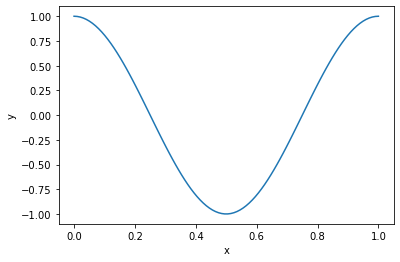

In [8]:
x = np.linspace(0,1,100) # equaly spaced array of 100 points from 0 to 1.
wl = 1 # wavelength
A = 1 # amplitude
y = A*np.cos(2*np.pi*x/wl)
plt.plot(x,y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

#### Plot a cosine from x=0 to x=4 with an amplitude of $A =0.5$ and a wavelength of $\lambda = 0.5$.

In [ ]:
# Type code here.

<br>
A traveling wave is similar to the cosine position wave from the last section, except is also moves with time.  A traveling wave is represented by the function $y = A \cos[\frac{2 \pi}{\lambda}(x- v t)]$, where $v$ is the speed of the wave.  Notice that when $t=0$, the wave looks the as the expression from before.  In this next section, you will make an interactive plot so you can watch the waveform travel. Run the code and then change the time $t$ and amplitude $A$ slider bars to see how the wave evolves. 

In [11]:
# To make the interactive plot, first import a new library called interactive
%matplotlib inline
from ipywidgets import interactive

# Define a function that plots a traveling wave
def f(A,t):
        plt.figure(2)
        x = np.linspace(0,4, num=50)
        v = 1 # speed 
        wl = 1 # wavelength
        A = 1 # amplitude
        plt.plot(x, A*np.cos(2*np.pi/wl*(x-v*t)))
        plt.ylim(-1,1)
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title('Traveling Wave')
        plt.show()

# Make the interactive plot        
interactive_plot = interactive(f, A=(0, 1.0), t=(0.00,1.00,0.01))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=0.5, description='A', max=1.0), FloatSlider(value=0.5, description='t'…

Change the time to $t=0.00$.  Notice that at $x=0$, the wave is at a maximum, or $y=1$.  Increase the time until the wave is again at a maximum at $x=0$.  **The period $T$ is how long it takes to go from one maximum to another.  What is the period of this traveling wave?** 

Answer the question here.

If you plot $y$ at a single position as a function of time, you get a sine wave but in time.  For example if $x=0$, then the traveling wave becomes $y = A \cos( 2 \pi \frac{v}{\lambda} t)$.  A wave in time is given by $y = A \cos(2 \pi f t)$, where $f$ is the frequency.  Comparing these two expression, we that the frequency is related to the velocity and wavelength by $f = \frac{v}{\lambda}$.  The frequency $f$ is related to the period $T$ by $f = 1/T$.  **From the velocity and wavelength of the traveling wave in the simulation, calculate the expected period.  Does it agree?**

<br>
<br>
## Plotting wavefunctions for particle in a box ##

  In classical mechanics, a particle has a definite position and velocity.  The huge conceptual leap that led to quantum mechanics is that particles actually behave like waves at the microscopic scale.  In the first two weeks of your CHM374 lectures, you will learn how particles in quantum mechanics are represented by quantum wavefunctions.  **The wavefunction is represented by a function $\Psi(x)$.**  The wave evolves with time (via the Schrodinger equation) Just as in classical waves, the wavefunction is spreadout over many different positions.   **The probability density function is given by the square magnitude of the wavefunction,   $|\Psi(x)|^2$, and gives the likelihood that the particle can be found at every position.** <br><br>


One of the simplest quantum systems, and one which you spend a lot of time with in CHM374, is the **1D particle in a box** model (also known as the **infinite square well**). A particle is trapped in a 1D box of width $L$.  We will define the coordinates so that the box is between $x=0$ and $x=L$.  The potential outside the box is infinite $V=\inf$, which means that the particle cannot exit the box.  The potential inside the box is zero $V=0$, so that the particle bounces back and forth within the box as a free particle.
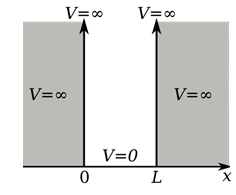

When the particle is trapped in the box, only waves with specific wavelengths are allowed because the probability of the particle must go to zero at the boundary conditions. This boundary condition leads to a discrete set of allowed energies:

$E_n =\frac{n^2 \pi^2 \hbar^2}{2 m L^2}$

Here $n$ is an integer, where $n=1$ is lowest energy, also called the **ground state energy**.  Each of these energies has a corresponding wavefunction:

$\Psi_n(x) = \sqrt{\frac{2}{L}} \sin(n \frac{ \pi x}{L} )$

In this next section, you will plot the lowest energy wavefunctions for the particle in a box model. As you learn quantum mechanics in CHM374, Python and Jupyter can be  powerful tools for visualizing wavefunctions.

Next you will plot the ground state wavefunction.

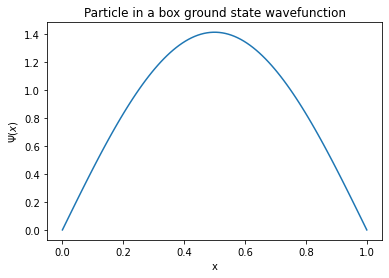

In [12]:
# Values for L and x
L = 1 # width of the square well
x_list = np.linspace(0,1,100) # evenly spaced array of 100 points
n=1 # n=1 is ground state wavefunction
y_list = np.sqrt(2/L)*np.sin(n*np.pi*x_list/L)

# Make the plot
plt.plot(x_list, y_list)

# Label your plot
plt.xlabel("x")
plt.ylabel("$\Psi(x)$")
plt.title("Particle in a box ground state wavefunction")

# Show the plot
plt.show()

Next you will plot the five lowest energy wavefunctions by defining a function, and then calling that function in a for loop.

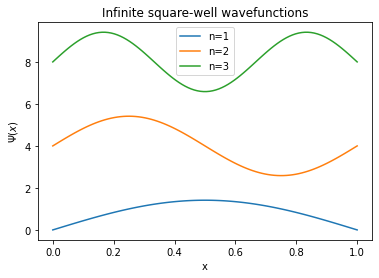

In [14]:
# Define a function that returns the particle in a box wavefunction. 
# x can be a single number or a list.
def psi(n,L,x):
    return np.sqrt(2/L)*np.sin(n*np.pi*x/L)

# For loop to plot multiple wavefunctions
L=1
offset = 4 # add offset so that wavefunctions are not on top of each other
for n in range(1,4):
    y_list = psi(n,L,x_list) + (n-1)*offset
    plt.plot(x_list, y_list)

plt.xlabel("x")
plt.ylabel("$\Psi(x)$")
plt.title("Infinite square-well wavefunctions")
plt.legend(['n=1','n=2','n=3'])
plt.show()

The probability of the particle being at a certain position $x$ is given by the wavefunction square, $\Psi(x)^2$.   To take the square of a list, type `y_list**2`. 

For this next part, you will write code that plots the first 5 wavefunctions squared. Copy and paste the code from the previous cell, and modify it.  Be sure to change the y-label to $\Psi^2(x)$, and update the legend to have all 5 labels. 

In [ ]:
### Insert your code here. 

<br>
Jupyter is also a powerful tool for performing calculations.  Many calculations in quantum mechanics involve extremely small numbers, which make calculators cubersome.  In this next example, you will calculate the discrete energies, or **eigen-energies**, for an electron in a particle in the box model.  We will assume that the width of the box is roughly the size of the hydrogen atom, $L = 3 a_0$, where $a_0 = 5.29\times 10^{-11}$ meters is the Bohr radius. This is a very crude model for a hydrogen atom, but we will see how accurate the energy is compared to the ground state hydrogen energy.  

In [15]:
# Define constants
h = 6.626e-34 # Planck's constant
hbar = h/(2*np.pi) # Reduced Planck's constant h/(2*pi)
m_electron = 9.11e-31 # mass of an electron in kg
eV = 1.602e-19 # 1 electron volt in Joules
a0 = 5.29e-11 # bohr radius (roughly the radius a ground state hydrogen atom)

# Calculate the energy 
n=1
L = 3*a0 # diameter of ground state hydrogen atom
E_Joules = n**2 * np.pi**2 * hbar**2/(2 * m_electron * L**2) # energy in Joules
print("Energy in Joules: ", E_Joules)

E_eV = E_Joules/eV # convert energy from Joules to electron volts
print("Energy in eV: ", E_eV)

Energy in Joules:  2.3918869295335245e-18
Energy in eV:  14.930630022056958


The actual ground state energy of the hydrogen atom is 13.6 eV!  This is pretty good agreement considering that we are ignoring the fact that the hydrogen atom is actually 3-dimensional, not 1-dimensional. In your quantum course, it can be very useful to have a notebook saved with all these constants.  


## Fourier Series: Adding multiple waves ## 
We have looked at the lowest energy waves in the particle in a box model. In your quantum course, you will learn about **wave-particle duality**, which describes how quantum particles sometimes behave like waves and sometime behave like localized particles.  

In this last section, you will see how you can add multiple cosine and sine waves to give other types of waveforms, including something that looks like a localized particle!   The theory of adding multiple sine waves to get an arbitrary waveform is called **Fourier Series**. 

The code below sums up the waves  $y_{total} = \sum_n A_n \cos(\pi n x/\lambda)$.   The amplitude of each wave is given in the array `A_list = np.array([A_1, A_2, A_3, A_4, A_5, A_6])`.  The following code plots $n=1$, which is also called the **first harmonic**.  Modify this code to look at the higher harmonics.  You will only need to change the variable `A_list`.

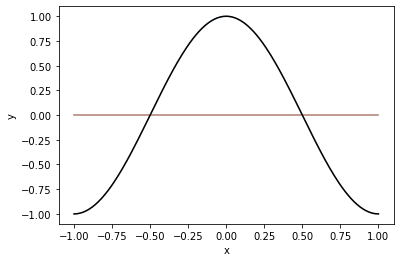

In [18]:
x = np.linspace(-1,1,201)
wl = 1 # wavelength of the n=1 wave

# Define amplitudes for each harmonic
A_list = np.array([1,0,0,0,0,0]) # plot only first harmonic

# Plot each waveform and the total waveform in black
y_total = np.zeros(np.size(x))
for n in range(1,np.size(A_list)):
    y = A_list[n-1] * np.cos(np.pi*n/wl*x)
    plt.plot(x,y,'-',alpha=0.3)
    y_total = y + y_total
    
plt.plot(x,y_total,"black")
plt.xlabel('x')
plt.ylabel('y')
plt.title('')
plt.show()   

Now you will sum up multiple cosine waves by setting multiple amplitude to non-zero values. Copy the code above, and change the list to  `A_list = [0.81, 0, .09, 0, .03, 0, 0.02, 0 , 0.1]`.   The black curve is the summed wave and the lighter curves are each individual wave.

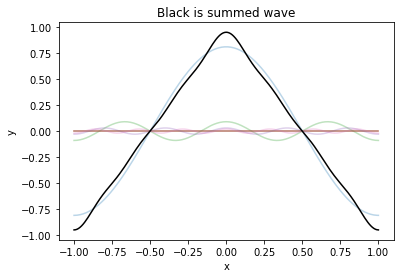

In [23]:
# Type your code here

x = np.linspace(-1,1,201)
wl = 1 # wavelength of the n=1 wave

# Define amplitudes for each harmonic
A_list = [0.81, 0, .09, 0, .03, 0, 0.02, 0 , 0.1] # triangle wave

# Plot each waveform and the total waveform in black
y_total = np.zeros(np.size(x))
for n in range(1,np.size(A_list)):
    y = A_list[n-1] * np.cos(np.pi*n/wl*x)
    plt.plot(x,y,'-',alpha=0.3)
    y_total = y + y_total
plt.plot(x,y_total,"black")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Black is summed wave')
plt.show()

Finally, copy the code again and try `A_list = [0.08, 0.19, 0.39, 0.66, 0.90, 1.00, 0.90, 0.66, 0.39, 0.19, 0.08].`  What do you observe?

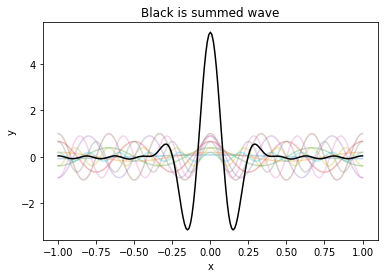

In [24]:
x = np.linspace(-1,1,201)
wl = 1 # wavelength of the n=1 wave

# Define amplitudes for each harmonic
#A_list = np.ones(40) # 10 harmonics
#A_list = [0.81, 0, .09, 0, .03, 0, 0.02, 0 , 0.1] # triangle wave
A_list = [0.08, 0.19, 0.39, 0.66, 0.90, 1.00, 0.90, 0.66, 0.39, 0.19, 0.08] # wave-packet

# Plot each waveform and the total waveform in black
y_total = np.zeros(np.size(x))
for n in range(1,np.size(A_list)):
    y = A_list[n-1] * np.cos(np.pi*n/wl*x)
    plt.plot(x,y,'-',alpha=0.3)
    y_total = y + y_total
plt.plot(x,y_total,"black")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Black is summed wave')
plt.show()

By adding up many waves, the waveform is now localized to the center.  In fact, by adding even more harmonics we can make the wave as small as you want. In our quantum course, you will learn about the wave-particle duality, which means that particles in quantum mechanics have both wave and particle characteristic.   We can see even in this simple wave example that by adding together many different wavelength, you can create something that looks like a particle. 
de Broglie equation tells us that each wavelength corresponds to a different particle momentum.  When a particle is represented by single momentum, or harmonic, it is spread out over the entire box.  But if the particle has many different momentum, it can be localized in position.  This is a great represetnation of the Heisenberg's poisition and momentum uncertainity principle. 


### 9. Discussion and Conclusions

Based on your observations, answer the following questions. Type your answers directly into the text cells following each question. (If instead of a text box you seen a statement like "Type Markdown and LaTeX:  $\alpha^2$", just double click on that text to open the text box.) These are *Markdown* cells, i.e., they accept text input using the Markdown text-formatting language. Markdown allows you to produce nicely-formatted text. For example: 
* Text enclosed in a single pair of asterisks `*like this*` will be formatted in italics. 
* Text enclosed in a double pair of asterisks `**like this**` will be formatted in bold. 
* Text enclosed in dollar signs `$like this$` will be interpreted as a mathematical equation using LaTex syntax. 

When you are finished with your answer, type <Shift+Enter> to convert your input into formatted text. If you want to modify your input, just double-click on it to re-enter text entry mode. 

#### Question 1: Write in your own words the fundamental different between quantum mechanics and classical mechanics?

#### Question 2: If we made `A_list` much larger, ie with 100 elements, what do you expect to happen to the waveform?

#### Question 3: 

#### Question 4: 

### 10. Submit! 

Finally, when you're satisfied with your answers, download your notebook as a PDF by selecting File > Print Preview from the dropdown menu at the top right of this window. (See screen shot below.) Then print the new window as a PDF, and save it under the Lab1 assignment on the Brightspace page **for your lab section**. <br>

Note: There are separate Brightspace pages for your lab section and for the Monday lecture. You will submit your PDF notebooks on your lab Brightspace page, **not** the Monday lecture page. 

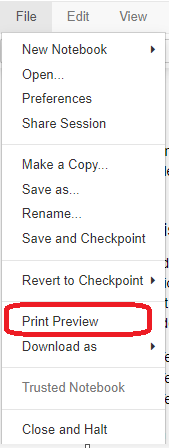